In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [5]:
from observer import Observer, Cone, neitz_cone
from inks import Neugebauer, InkGamut

## Visualizing Neitz Data

In [28]:
def n(wavelengths, peak=419, od=0.35):
    data = np.clip(neitz_cone(wavelengths, lambda_max=peak, OD=od, output="alog")[0], 0, 1)
    return Cone(wavelengths=wavelengths, data=data)

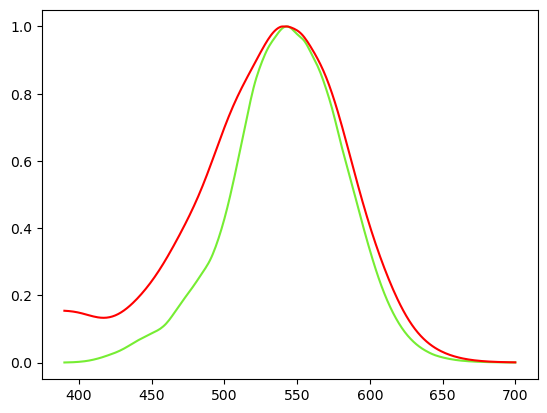

In [34]:
Cone.m_cone().plot()
n(wavelengths1, peak=543, od=0.05).plot(color='red')

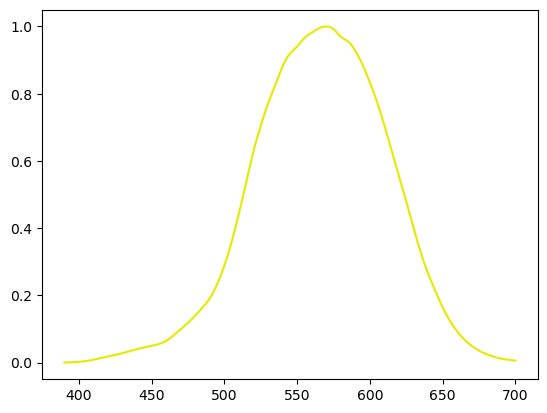

In [37]:
Cone.l_cone().plot()

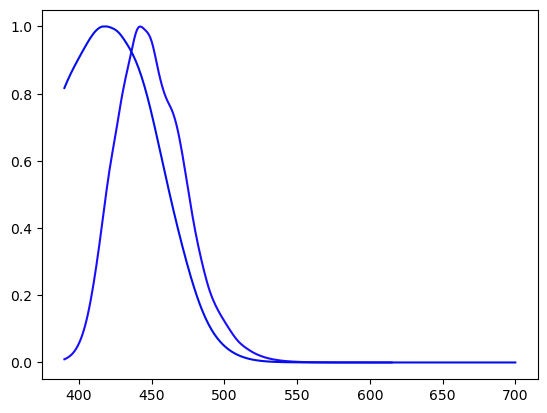

In [4]:
Cone.s_cone().plot()
Cone.neitz_s().plot()

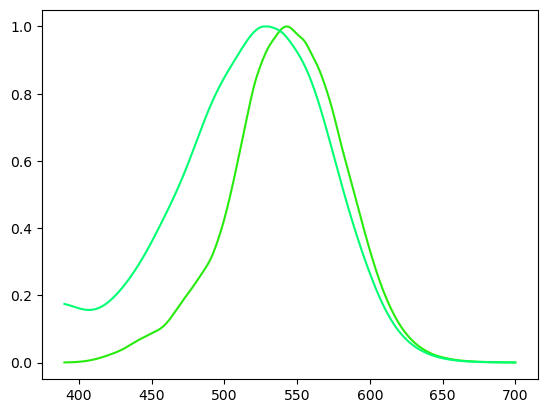

In [5]:
Cone.m_cone().plot()
Cone.neitz_m().plot()

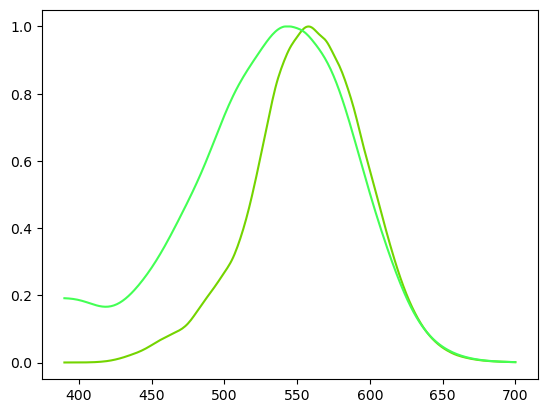

In [6]:
Cone.q_cone().plot()
Cone.neitz_q().plot()

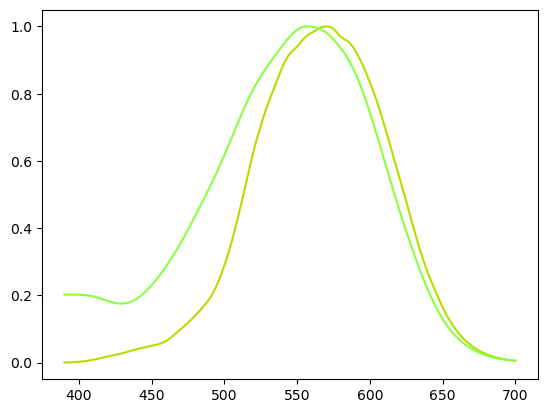

In [7]:
Cone.l_cone().plot()
Cone.neitz_l().plot()

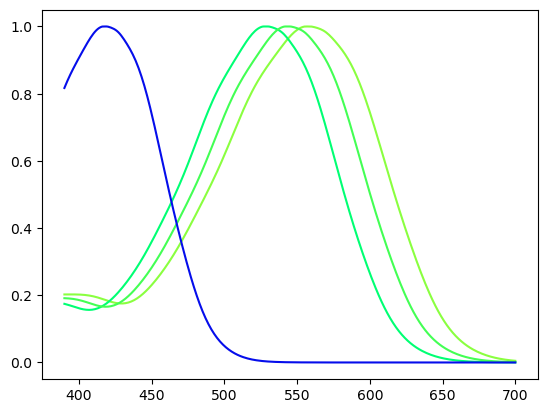

In [8]:
Cone.neitz_l().plot()
Cone.neitz_m().plot()
Cone.neitz_q().plot()
Cone.neitz_s().plot()

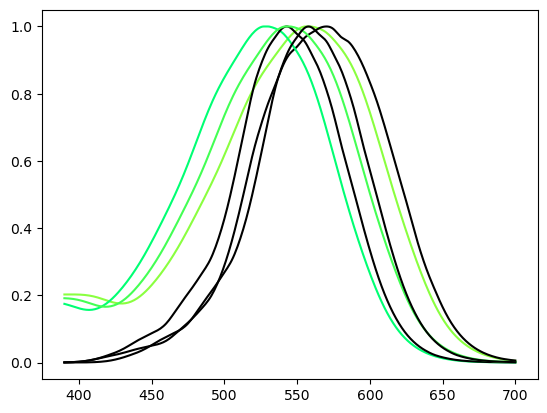

In [19]:
Cone.neitz_l().plot()
Cone.l_cone().plot(color='black')
Cone.neitz_m().plot()
Cone.m_cone().plot(color='black')

Cone.neitz_q().plot()
Cone.q_cone().plot(color='black')


## Setting up illuminants

In [9]:
import colour
colour_d65 = colour.SDS_ILLUMINANTS.get('D65')
d65 = Spectra(data=colour_d65.values / np.max(colour_d65.values), wavelengths=colour_d65.wavelengths)

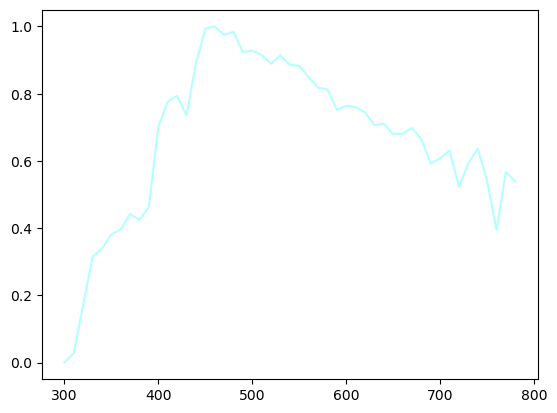

In [10]:
d65.plot()

In [15]:
tetrachromat_d65 = Observer.neitz_tetrachromat(illuminant=d65)
tetrachromat_not_neitz = Observer.tetrachromat(illuminant=d65)
                                               
trichromat_d65 = Observer.neitz_trichromat(illuminant=d65)

## Recalculate best inks

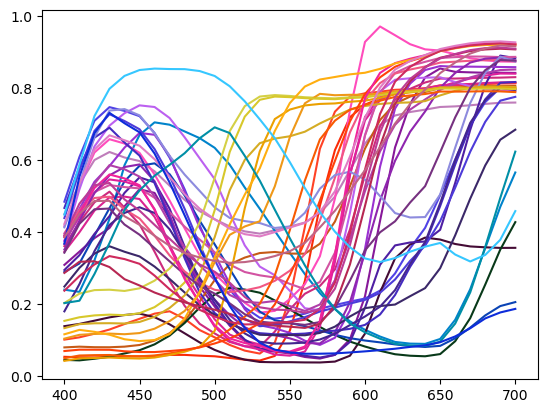

In [28]:
all_inks = {}
fig, axc = plt.subplots()
with open(f'Inks_all.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i >= 4:
            name = row[4]
            color_data = np.array(row[33:],dtype=float)
            spectra = Spectra(data=color_data, wavelengths=wavelengths10)
            spectra.plot(ax=axc)
            
            all_inks[name] = spectra
            
plt.show()

In [30]:
cmy_primaries_dict = {}
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

primary_fns = [
    "000",
    "001",
    "010",
    "100",
    "011",
    "110",
    "101",
    "111",
]

for fn in primary_fns:
    with open(f'PrintColors/{fn}.csv') as csvf:
        spamreader = csv.reader(csvf, delimiter=';')
        for i, row in enumerate(spamreader):
            if i == 4:
                color_data = np.array(row[33:],dtype=float)
                spectra = Spectra(data=color_data, wavelengths=wavelengths10)
                cmy_primaries_dict[fn] = spectra

In [31]:
paper = cmy_primaries_dict["000"]
cyan = cijk["2000"]
magenta = cmy_primaries_dict["010"]
yellow = cmy_primaries_dict["001"]

In [37]:
gamut = InkGamut([cyan, magenta, yellow], paper=paper, illuminant=d65)
width = gamut.get_width(tetrachromat_d65, stepsize=0.05)

[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████████| 9261/9261 [00:00<00:00, 74897.42it/s]

Point cloud generated.


maximum distance is 0.027910905527253393 with percentages (0.70000000000000007, 0.70000000000000007, 0.25) and (0.70000000000000007, 0.55000000000000004, 0.30000000000000004)


In [35]:
widths = []
for name, spectra in all_inks.items():
    gamut = InkGamut([cyan, magenta, yellow, spectra], paper=paper, illuminant=d65)
    width = gamut.get_width(tetrachromat_d65, stepsize=0.05)
    widths.append((width, name))

widths.sort(reverse=True)

[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79459.46it/s]


Point cloud generated.
maximum distance is 0.030426394540039425 with percentages (0.70000000000000007, 0.75, 0.15000000000000002, 0.050000000000000003) and (0.65000000000000002, 0.20000000000000001, 0.25, 0.95000000000000007)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79450.93it/s]


Point cloud generated.
maximum distance is 0.029967008304213505 with percentages (0.65000000000000002, 0.050000000000000003, 0.5, 0.45000000000000001) and (0.75, 0.35000000000000003, 0.55000000000000004, 0.0)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78778.97it/s]


Point cloud generated.
maximum distance is 0.0300908599205994 with percentages (0.60000000000000009, 0.45000000000000001, 0.55000000000000004, 0.25) and (0.25, 0.40000000000000002, 0.55000000000000004, 0.60000000000000009)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79684.53it/s]


Point cloud generated.
maximum distance is 0.02945771653058965 with percentages (0.45000000000000001, 0.60000000000000009, 0.10000000000000001, 0.55000000000000004) and (0.30000000000000004, 0.10000000000000001, 0.35000000000000003, 0.90000000000000002)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79843.91it/s]


Point cloud generated.
maximum distance is 0.029197521702576112 with percentages (0.75, 0.5, 0.20000000000000001, 0.15000000000000002) and (0.70000000000000007, 0.45000000000000001, 0.25, 0.10000000000000001)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78048.22it/s]


Point cloud generated.
maximum distance is 0.029282867871080587 with percentages (0.75, 0.5, 0.10000000000000001, 0.25) and (0.75, 0.25, 0.20000000000000001, 0.30000000000000004)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79959.72it/s]


Point cloud generated.
maximum distance is 0.029915556901381257 with percentages (0.70000000000000007, 0.60000000000000009, 0.20000000000000001, 0.15000000000000002) and (0.70000000000000007, 0.10000000000000001, 0.35000000000000003, 0.40000000000000002)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78772.07it/s]


Point cloud generated.
maximum distance is 0.029246734928031926 with percentages (0.75, 0.15000000000000002, 0.25, 0.5) and (0.70000000000000007, 0.30000000000000004, 0.30000000000000004, 0.25)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79689.46it/s]


Point cloud generated.
maximum distance is 0.029415345951641914 with percentages (0.80000000000000004, 0.10000000000000001, 0.050000000000000003, 0.75) and (0.75, 0.050000000000000003, 0.30000000000000004, 0.55000000000000004)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78477.67it/s]


Point cloud generated.
maximum distance is 0.029574092192706347 with percentages (0.70000000000000007, 0.5, 0.10000000000000001, 0.5) and (0.70000000000000007, 0.15000000000000002, 0.25, 0.65000000000000002)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79158.06it/s]


Point cloud generated.
maximum distance is 0.02952035495657812 with percentages (0.45000000000000001, 0.0, 0.10000000000000001, 0.55000000000000004) and (0.65000000000000002, 0.55000000000000004, 0.25, 0.050000000000000003)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78427.50it/s]


Point cloud generated.
maximum distance is 0.030213028875449077 with percentages (0.55000000000000004, 0.25, 0.5, 0.35000000000000003) and (0.35000000000000003, 0.15000000000000002, 0.40000000000000002, 0.5)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78640.30it/s]


Point cloud generated.
maximum distance is 0.029554523436217617 with percentages (0.5, 0.75, 0.10000000000000001, 0.25) and (0.5, 0.60000000000000009, 0.20000000000000001, 0.20000000000000001)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79081.49it/s]


Point cloud generated.
maximum distance is 0.029520521082009366 with percentages (0.45000000000000001, 0.050000000000000003, 0.35000000000000003, 0.65000000000000002) and (0.60000000000000009, 0.5, 0.25, 0.15000000000000002)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 77197.88it/s]


Point cloud generated.
maximum distance is 0.029302668265580423 with percentages (0.70000000000000007, 0.35000000000000003, 0.25, 0.35000000000000003) and (0.70000000000000007, 0.20000000000000001, 0.35000000000000003, 0.30000000000000004)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79665.08it/s]


Point cloud generated.
maximum distance is 0.030141234518077598 with percentages (0.60000000000000009, 0.10000000000000001, 0.45000000000000001, 0.65000000000000002) and (0.60000000000000009, 0.15000000000000002, 0.45000000000000001, 0.45000000000000001)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 72642.21it/s]


Point cloud generated.
maximum distance is 0.030335717084716052 with percentages (0.55000000000000004, 0.55000000000000004, 0.0, 1.0) and (0.60000000000000009, 0.65000000000000002, 0.10000000000000001, 0.25)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78552.19it/s]


Point cloud generated.
maximum distance is 0.029694717455900965 with percentages (0.80000000000000004, 0.10000000000000001, 0.65000000000000002, 0.40000000000000002) and (0.80000000000000004, 0.15000000000000002, 0.75, 0.050000000000000003)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78137.14it/s]


Point cloud generated.
maximum distance is 0.031128274640822018 with percentages (0.70000000000000007, 0.65000000000000002, 0.050000000000000003, 0.30000000000000004) and (0.75, 0.0, 0.15000000000000002, 0.85000000000000009)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78568.47it/s]


Point cloud generated.
maximum distance is 0.029900904036715248 with percentages (0.55000000000000004, 0.5, 0.0, 0.55000000000000004) and (0.60000000000000009, 0.75, 0.0, 0.10000000000000001)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79738.92it/s]


Point cloud generated.
maximum distance is 0.029437179599169083 with percentages (0.60000000000000009, 0.25, 0.0, 0.95000000000000007) and (0.60000000000000009, 0.55000000000000004, 0.050000000000000003, 0.35000000000000003)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79737.62it/s]


Point cloud generated.
maximum distance is 0.029876808704520474 with percentages (0.65000000000000002, 0.60000000000000009, 0.25, 0.15000000000000002) and (0.55000000000000004, 0.15000000000000002, 0.45000000000000001, 0.40000000000000002)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79697.69it/s]


Point cloud generated.
maximum distance is 0.02986061336180512 with percentages (0.65000000000000002, 0.40000000000000002, 0.35000000000000003, 0.25) and (0.5, 0.050000000000000003, 0.40000000000000002, 0.5)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79764.47it/s]


Point cloud generated.
maximum distance is 0.029815831368368573 with percentages (0.65000000000000002, 0.55000000000000004, 0.30000000000000004, 0.20000000000000001) and (0.65000000000000002, 0.40000000000000002, 0.40000000000000002, 0.15000000000000002)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79617.52it/s]


Point cloud generated.
maximum distance is 0.029904795047477284 with percentages (0.60000000000000009, 0.40000000000000002, 0.35000000000000003, 0.30000000000000004) and (0.70000000000000007, 0.40000000000000002, 0.45000000000000001, 0.050000000000000003)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78955.07it/s]


Point cloud generated.
maximum distance is 0.029681463949499942 with percentages (0.60000000000000009, 0.5, 0.20000000000000001, 0.80000000000000004) and (0.60000000000000009, 0.25, 0.35000000000000003, 0.85000000000000009)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78287.18it/s]


Point cloud generated.
maximum distance is 0.02998849670079834 with percentages (0.80000000000000004, 0.25, 0.25, 0.70000000000000007) and (0.80000000000000004, 0.050000000000000003, 0.35000000000000003, 0.75)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78988.41it/s]


Point cloud generated.
maximum distance is 0.03005345819648303 with percentages (0.80000000000000004, 0.35000000000000003, 0.55000000000000004, 0.20000000000000001) and (0.75, 0.20000000000000001, 0.35000000000000003, 0.75)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79836.21it/s]


Point cloud generated.
maximum distance is 0.02921106543444424 with percentages (0.80000000000000004, 0.35000000000000003, 0.0, 0.65000000000000002) and (0.75, 0.25, 0.10000000000000001, 0.60000000000000009)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78741.10it/s]


Point cloud generated.
maximum distance is 0.029307134112422695 with percentages (0.70000000000000007, 0.70000000000000007, 0.10000000000000001, 0.10000000000000001) and (0.70000000000000007, 0.45000000000000001, 0.050000000000000003, 0.25)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78904.96it/s]


Point cloud generated.
maximum distance is 0.029162062948455802 with percentages (0.80000000000000004, 0.35000000000000003, 0.30000000000000004, 0.30000000000000004) and (0.80000000000000004, 0.20000000000000001, 0.15000000000000002, 0.45000000000000001)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79777.03it/s]


Point cloud generated.
maximum distance is 0.029776241391622105 with percentages (0.80000000000000004, 0.30000000000000004, 0.10000000000000001, 0.90000000000000002) and (0.80000000000000004, 0.10000000000000001, 0.65000000000000002, 0.35000000000000003)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 77099.28it/s]


Point cloud generated.
maximum distance is 0.02971038399268361 with percentages (0.60000000000000009, 0.60000000000000009, 0.0, 0.40000000000000002) and (0.55000000000000004, 0.25, 0.15000000000000002, 0.55000000000000004)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 77562.66it/s]


Point cloud generated.
maximum distance is 0.029495499156094895 with percentages (0.75, 0.55000000000000004, 0.0, 0.25) and (0.70000000000000007, 0.45000000000000001, 0.20000000000000001, 0.15000000000000002)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78533.12it/s]


Point cloud generated.
maximum distance is 0.029258207663463764 with percentages (0.70000000000000007, 0.55000000000000004, 0.20000000000000001, 0.20000000000000001) and (0.70000000000000007, 0.10000000000000001, 0.35000000000000003, 0.40000000000000002)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 77983.06it/s]


Point cloud generated.
maximum distance is 0.029915690421975227 with percentages (0.85000000000000009, 0.20000000000000001, 0.80000000000000004, 0.050000000000000003) and (0.85000000000000009, 0.0, 0.80000000000000004, 0.20000000000000001)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79761.33it/s]


Point cloud generated.
maximum distance is 0.030022399447064863 with percentages (0.75, 0.20000000000000001, 0.35000000000000003, 0.40000000000000002) and (0.75, 0.30000000000000004, 0.55000000000000004, 0.050000000000000003)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 80100.64it/s]


Point cloud generated.
maximum distance is 0.029340824984011638 with percentages (0.70000000000000007, 0.050000000000000003, 0.10000000000000001, 0.70000000000000007) and (0.65000000000000002, 0.30000000000000004, 0.20000000000000001, 0.35000000000000003)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 81054.15it/s]


Point cloud generated.
maximum distance is 0.02978219354133993 with percentages (0.35000000000000003, 0.15000000000000002, 0.0, 0.45000000000000001) and (0.35000000000000003, 0.0, 0.050000000000000003, 0.60000000000000009)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79558.73it/s]


Point cloud generated.
maximum distance is 0.029748623504772143 with percentages (0.20000000000000001, 0.80000000000000004, 0.15000000000000002, 0.60000000000000009) and (0.050000000000000003, 0.70000000000000007, 0.20000000000000001, 0.70000000000000007)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79031.61it/s]


Point cloud generated.
maximum distance is 0.029705133497300196 with percentages (0.70000000000000007, 0.25, 0.35000000000000003, 0.5) and (0.70000000000000007, 0.30000000000000004, 0.45000000000000001, 0.20000000000000001)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 78171.76it/s]


Point cloud generated.
maximum distance is 0.030053752084239216 with percentages (0.55000000000000004, 0.85000000000000009, 0.0, 0.15000000000000002) and (0.20000000000000001, 0.5, 0.20000000000000001, 0.45000000000000001)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79470.17it/s]


Point cloud generated.
maximum distance is 0.029343963558855046 with percentages (0.70000000000000007, 0.65000000000000002, 0.20000000000000001, 0.15000000000000002) and (0.70000000000000007, 0.25, 0.30000000000000004, 0.5)
[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:02<00:00, 79375.95it/s]


Point cloud generated.
maximum distance is 0.030100073799621596 with percentages (0.60000000000000009, 0.35000000000000003, 0.65000000000000002, 0.60000000000000009) and (0.55000000000000004, 0.20000000000000001, 0.75, 0.65000000000000002)


In [36]:
widths

[(0.031128274640822018, 'Robert oster '),
 (0.030426394540039425, 'Bouquet dantan H'),
 (0.030335717084716052, 'Platinum Violet2'),
 (0.030213028875449077, 'Kaweco green'),
 (0.030141234518077598, 'Platinum violet'),
 (0.030100073799621596, 'Colorberse 7 clear cyan'),
 (0.0300908599205994, 'Bleu pervenche h'),
 (0.030053752084239216, 'Bay state blue'),
 (0.030053458196483029, 'Yellow fire'),
 (0.030022399447064863, 'Pink radish'),
 (0.029988496700798339, 'Inkbara danelion'),
 (0.029967008304213505, 'Rose cyclamen H'),
 (0.029915690421975227, 'Rokyu moon yellow'),
 (0.029915556901381257, 'Hope pink D'),
 (0.029904795047477284, 'Media beliar '),
 (0.029900904036715248, 'Opportunity'),
 (0.029876808704520474, 'North African violet'),
 (0.029860613361805122, 'Violet lion'),
 (0.029815831368368573, 'Pineider violet'),
 (0.02978219354133993, 'Fairytale pink'),
 (0.029776241391622105, 'Inkbara yellow'),
 (0.029748623504772143, 'Inkbara cyan'),
 (0.029710383992683609, 'Violet bee'),
 (0.029705

## Need to learn more about neitz tetrachromatic gamut

In [39]:
tetra_full_colors = tetrachromat_d65.get_full_colors()

In [42]:
tetra_gamut_buckets = bucket_points(tetra_full_colors.T)

In [59]:
tetra_gamut_buckets

defaultdict(list,
            {(-1, -1, -1): [((0.0, 0.0, 0.0, 0.0), 0)],
             (-1, -1, 0): [((0.0, 0.0, 0.0, 0.0), 0)],
             (-1, 0, -1): [((0.0, 0.0, 0.0, 0.0), 0)],
             (-1, 0, 0): [((0.0, 0.0, 0.0, 0.0), 0)],
             (0, -1, -1): [((0.0, 0.0, 0.0, 0.0), 0)],
             (0, -1, 0): [((0.0, 0.0, 0.0, 0.0), 0)],
             (0, 0, -1): [((0.0, 0.0, 0.0, 0.0), 0)],
             (0, 0, 0): [((0.0, 0.0, 0.0, 0.0), 0)],
             (121,
              112,
              117): [((1.2180962339618087,
                1.1352363891260908,
                1.1590829711779189,
                1.1840497494388356),
               1), ((1.2180961589158812,
                1.1332763393530212,
                1.1523747764980008,
                1.166246996673677),
               142505), ((1.2180961717285865,
                1.1341974728143946,
                1.1550402117498633,
                1.1721996492628521),
               142507)],
             (121,
        

In [60]:
tetra_gamut_buckets[(28, 54, 55)]

[((0.29496419089427961,
   0.53909210457708157,
   0.57900868473918843,
   0.57203793345040788),
  40357),
 ((0.28878013509363837,
   0.5364905277843327,
   0.56485110611790779,
   0.55225378599101382),
  152667),
 ((0.28783783372894645,
   0.54476488570095594,
   0.56660095895698837,
   0.55057992154789381),
  442607),
 ((0.27935057379786993,
   0.55302237761631956,
   0.57226768768757053,
   0.5545333755150107),
  518278),
 ((0.27591116684910083,
   0.55493629770833752,
   0.55189710656221058,
   0.55253480243262942),
  581684),
 ((0.28108341806214604,
   0.551717463800665,
   0.55343174516671034,
   0.5563932569487583),
  587161),
 ((0.28030059196327317,
   0.5483800173618788,
   0.55971228102611337,
   0.56628179410430957),
  587812),
 ((0.28000394822626923,
   0.55389004057802937,
   0.56497460951874756,
   0.55201902320976037),
  588242),
 ((0.28002424906229573,
   0.53876902978718255,
   0.55990713582104135,
   0.5734180071950522),
  588345),
 ((0.28003711852735902,
   0.5426778

In [44]:
sort_buckets(tetra_gamut_buckets)

[(0.063199419772353327, (594526, 440379)),
 (0.062221992158986383, (554685, 29389)),
 (0.061449353745170132, (363268, 58552)),
 (0.061449353745170132, (363268, 58552)),
 (0.060715670503635799, (594526, 361949)),
 (0.060448295787895234, (543885, 171947)),
 (0.060415984527462996, (363260, 57091)),
 (0.059900105768027512, (581699, 41722)),
 (0.059900105768027512, (581699, 41722)),
 (0.059676793411548301, (349648, 97453)),
 (0.059600871687858881, (196789, 95180)),
 (0.059600279179452764, (363138, 55833)),
 (0.059295569199095066, (184130, 83433)),
 (0.059283608058880999, (34776, 394033)),
 (0.059283608058880999, (34776, 394033)),
 (0.059107248864971207, (534464, 150896)),
 (0.059061335849488028, (594174, 440379)),
 (0.058883372771224685, (375788, 185167)),
 (0.058491096940649578, (591776, 41754)),
 (0.058491096940649578, (591776, 41754)),
 (0.057934634964870058, (265433, 51462)),
 (0.057934634964870002, (319183, 87431)),
 (0.057839286702685344, (486074, 146114)),
 (0.057839286702685344, (26

In [46]:
m1 = Spectra(data=tetrachromat_d65.get_transition(594526), wavelengths=tetrachromat_d65.wavelengths)
m2 =  Spectra(data=tetrachromat_d65.get_transition(440379), wavelengths=tetrachromat_d65.wavelengths)

In [54]:
tetra_full_colors.T[594526]

array([ 0.28818604,  0.54805722,  0.53565397,  0.55535946])

In [55]:
tetra_full_colors.T[440379]

array([ 0.27146848,  0.57356457,  0.59885339,  0.58323726])

In [48]:
tetrachromat_d65.observe(m1)

array([ 0.28818604,  0.54805722,  0.53565397,  0.55535946])

In [50]:
tetrachromat_d65.observe(m2)

array([ 0.27146848,  0.57356457,  0.59885339,  0.58323726])

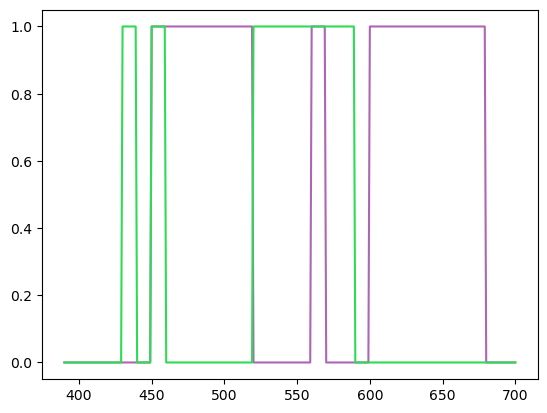

In [47]:
m1.plot()
m2.plot()

## Observing the CPVY gamut

In [12]:
cijk = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk[name] = spectra

In [13]:
cijk_neug = CellNeugebauer(cijk)
cijk_gamut_d65 = InkGamut(cijk_neug, illuminant=d65)  # currently the observers illuminant is basically ignored

In [14]:
cijk_gamut_d65.get_width(tetrachromat_d65, stepsize=0.02)

[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|███████████| 6765201/6765201 [02:08<00:00, 52513.55it/s]


Point cloud generated.
maximum distance is 0.03398852084752241 with percentages (0.02, 0.040000000000000001, 0.95999999999999996, 0.90000000000000002) and (0.35999999999999999, 0.95999999999999996, 0.040000000000000001, 0.5)


0.033988520847522408

In [16]:
cijk_gamut_d65.get_width(tetrachromat_not_neitz, stepsize=0.05)

[ 5.28436807  8.21626942  8.00093046  9.58828847]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:03<00:00, 53884.11it/s]


Point cloud generated.
maximum distance is 0.05105307213673249 with percentages (0.0, 0.15000000000000002, 0.45000000000000001, 0.60000000000000009) and (0.15000000000000002, 0.70000000000000007, 0.0, 0.10000000000000001)


0.051053072136732491

In [14]:
cijk_gamut_d65.get_width(trichromat_d65)

[  5.71127639  11.04192077  11.99583733]


Generating Point Cloud: 100%|███████████████| 14641/14641 [00:00<00:00, 39343.86it/s]


Point cloud generated.
maximum distance is 0.19116422006296352 with percentages (0.70000000000000007, 0.0, 0.0, 0.80000000000000004) and (0.0, 0.90000000000000002, 0.0, 0.30000000000000004)


0.19116422006296352

In [20]:
cijk_gamut_d65_buckets10 = cijk_gamut_d65.get_buckets(tetrachromat_d65)

[  5.71127639  11.04192077  11.53414442  11.99583733]


Generating Point Cloud: 100%|███████████████| 14641/14641 [00:00<00:00, 50659.51it/s]


Point cloud generated.


In [21]:
yellow_dominant = []
peach_dominant = []

for d, (a,b) in cijk_gamut_d65_buckets10[:10]:
    print(round(d,4), end=",\t")
    print([round(1000*_a)/10 for _a in a], end=",\t")
    print([round(1000*_b)/10 for _b in b])
    
    for p in (a,b):
        if p[3] > p[1]:
            yellow_dominant.append(p)
        else:
            peach_dominant.append(p)

0.0291,	[0.0, 30.0, 90.0, 80.0],	[30.0, 90.0, 20.0, 50.0]
0.0283,	[0.0, 30.0, 60.0, 80.0],	[30.0, 70.0, 0.0, 70.0]
0.028,	[10.0, 30.0, 80.0, 100.0],	[40.0, 100.0, 0.0, 100.0]
0.0277,	[10.0, 0.0, 90.0, 80.0],	[30.0, 90.0, 20.0, 30.0]
0.0277,	[10.0, 0.0, 90.0, 80.0],	[30.0, 90.0, 20.0, 30.0]
0.0275,	[50.0, 10.0, 70.0, 50.0],	[60.0, 50.0, 30.0, 40.0]
0.0271,	[30.0, 0.0, 80.0, 60.0],	[50.0, 80.0, 10.0, 0.0]
0.0271,	[30.0, 0.0, 80.0, 60.0],	[50.0, 80.0, 10.0, 0.0]
0.027,	[0.0, 30.0, 90.0, 80.0],	[40.0, 100.0, 0.0, 0.0]
0.0269,	[10.0, 0.0, 80.0, 50.0],	[40.0, 60.0, 40.0, 20.0]


In [49]:
np.mean(yellow_dominant,axis=0)

array([ 0.13,  0.1 ,  0.62,  0.87])

In [50]:
np.std(yellow_dominant,axis=0)

array([ 0.11874342,  0.1       ,  0.08717798,  0.11874342])

In [51]:
np.mean(peach_dominant, axis=0)

array([ 0.33,  0.89,  0.04,  0.41])

In [52]:
np.std(peach_dominant, axis=0)

array([ 0.11874342,  0.10440307,  0.04898979,  0.2118962 ])

In [172]:
cijk_gamut_d65_buckets05 = cijk_gamut_d65.get_buckets(tetrachromat_d65, stepsize=0.05)

[ 5.28436807  8.21626942  8.00093046  9.58828847]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:03<00:00, 55625.41it/s]


Point cloud generated.


In [173]:
for d, (a,b) in cijk_gamut_d65_buckets05[:20]:
    print(round(d,4), end=",\t")
    print([round(1000*_a)/10 for _a in a], end=",\t")
    print([round(1000*_b)/10 for _b in b])

0.0399,	[0.0, 0.0, 65.0, 100.0],	[25.0, 100.0, 0.0, 50.0]
0.0384,	[0.0, 5.0, 55.0, 95.0],	[20.0, 95.0, 0.0, 45.0]
0.0381,	[0.0, 0.0, 60.0, 80.0],	[25.0, 85.0, 0.0, 25.0]
0.0379,	[0.0, 10.0, 55.0, 80.0],	[20.0, 90.0, 0.0, 15.0]
0.0373,	[0.0, 0.0, 65.0, 90.0],	[25.0, 100.0, 0.0, 0.0]
0.037,	[0.0, 15.0, 55.0, 95.0],	[20.0, 100.0, 0.0, 40.0]
0.0365,	[0.0, 10.0, 60.0, 75.0],	[20.0, 90.0, 5.0, 0.0]
0.0363,	[5.0, 10.0, 55.0, 90.0],	[25.0, 90.0, 0.0, 50.0]
0.0361,	[0.0, 15.0, 60.0, 85.0],	[25.0, 95.0, 0.0, 10.0]
0.0361,	[0.0, 0.0, 60.0, 90.0],	[20.0, 90.0, 5.0, 45.0]
0.036,	[5.0, 0.0, 55.0, 90.0],	[25.0, 85.0, 0.0, 55.0]
0.0356,	[0.0, 5.0, 65.0, 80.0],	[25.0, 90.0, 5.0, 10.0]
0.0355,	[0.0, 10.0, 55.0, 85.0],	[20.0, 95.0, 0.0, 5.0]
0.0354,	[5.0, 0.0, 55.0, 95.0],	[25.0, 85.0, 0.0, 70.0]
0.0352,	[0.0, 10.0, 60.0, 90.0],	[20.0, 95.0, 5.0, 35.0]
0.0352,	[0.0, 5.0, 60.0, 100.0],	[25.0, 95.0, 0.0, 65.0]
0.035,	[0.0, 5.0, 70.0, 90.0],	[30.0, 100.0, 0.0, 10.0]
0.0344,	[0.0, 0.0, 60.0, 75.0],	[25.0, 85

## Samples

In [298]:
mets = {}
with open(f'010924.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Mets": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets[name] = spectra

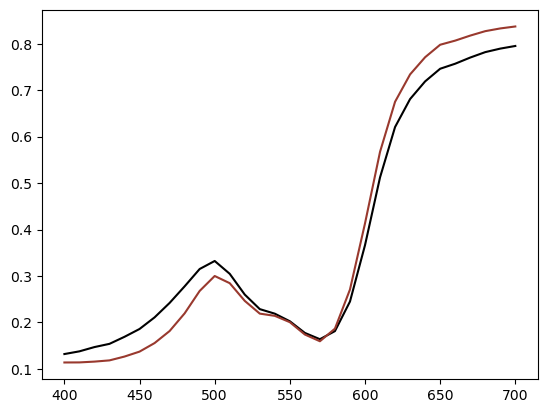

In [60]:
mets["10 10 60 90"].plot(color='black')
cijk_gamut_d65.get_spectra((0.1, 0.1, 0.6, 0.9)).plot()

In [ ]:
com

In [106]:
def compare_spectra(spectra1: Spectra, spectra2: Spectra):
    return np.sum((spectra1.data() - spectra2.data()) ** 2)

In [186]:
def get_adjust(gamut:InkGamut, percentages, target_spectra):
    point = np.array(percentages)
    delta = 0.2
    ranges = [np.arange(p - delta, p + delta + 0.01, 0.05) for p in point]

    mesh = np.meshgrid(*ranges)
    best_score = 100
    best_adjust = None
    
    for values in zip(*[m.flatten() for m in mesh]):
        values = np.array(values)
        if any(values < 0) or any(values > 1): continue
        sample_spectra = gamut.get_spectra(values)
        score = compare_spectra(target_spectra, sample_spectra)
        if score < best_score:
            best_score = score
            best_adjust = values
            
            
    print(best_adjust)
    return best_adjust - point, best_score

In [146]:
adjust, score = get_adjust(cijk_gamut_d65, (0.1, 0.1, 0.6, 0.9), mets["10 10 60 90"])

[ 0.15  0.    0.65  0.8 ]


In [147]:
adjust

array([ 0.05, -0.1 ,  0.05, -0.1 ])

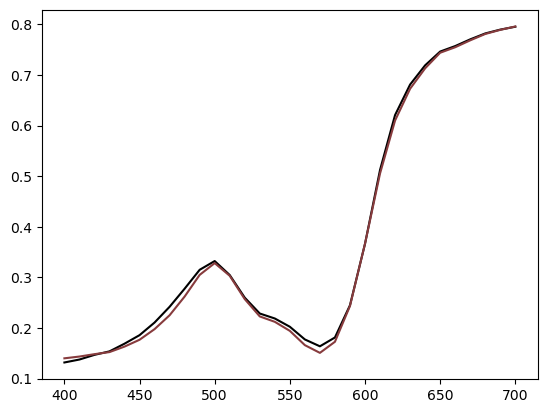

In [148]:
mets["10 10 60 90"].plot(color='black')
cijk_gamut_d65.get_spectra((0.15, 0, 0.65,0.8)).plot()

In [150]:
a, s = get_adjust(cijk_gamut_d65, (0.3, 0.9, 0, 0.4), mets["30 90 00 40"])

[ 0.3   0.8   0.05  0.3 ]


In [151]:
a

array([  5.55111512e-17,  -1.00000000e-01,   5.00000000e-02,
        -1.00000000e-01])

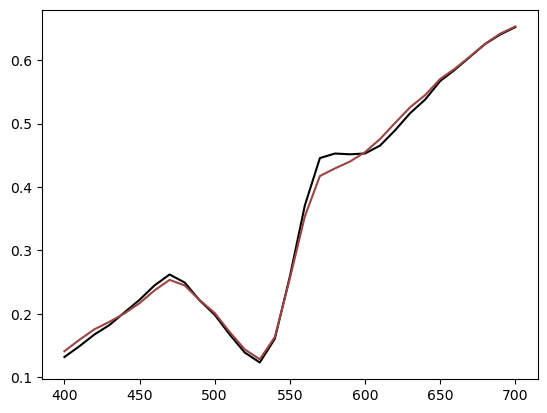

In [153]:
mets["30 90 00 40"].plot(color='black')
cijk_gamut_d65.get_spectra((0.3, 0.8, 0.05, 0.3)).plot()

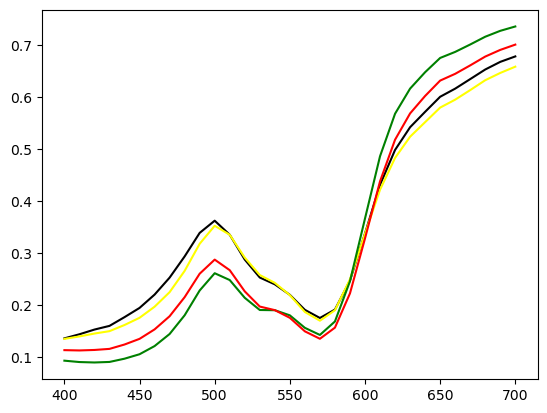

In [167]:
mets["25 10 65 90"].plot(color='black')
cijk_gamut_d65.get_spectra((0.3, 0, 0.55, 0.8)).plot(color='yellow')

cijk_gamut_d65.get_spectra((0.2, 0.2, 0.6, 1)).plot(color='green')
cijk_gamut_d65.get_spectra((0.25, 0.1, 0.65, 0.9)).plot(color='red')

In [163]:
x, y = get_adjust(cijk_gamut_d65, (0.25, 0.1, 0.65, 0.9), mets["25 10 65 90"])

[ 0.3   0.    0.55  0.8 ]


In [169]:
x

array([ 0.05, -0.1 , -0.1 , -0.1 ])

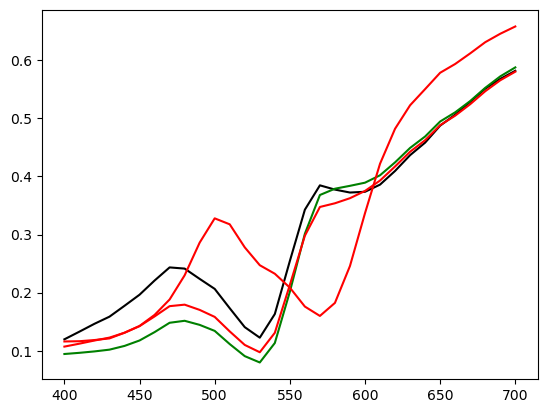

In [164]:
mets["40 90 05 60"].plot(color='black')
cijk_gamut_d65.get_spectra((0.4, 1, 0, 0.7)).plot(color='green')
cijk_gamut_d65.get_spectra((0.4, 0.9, 0.05, 0.6)).plot(color='red')

In [174]:
 get_adjust(cijk_gamut_d65, (0.4, 0.9, 0.05, 0.6), mets["40 90 05 60"])

[ 0.4  0.8  0.   0.5]


(array([ 0.  , -0.1 , -0.05, -0.1 ]), 0.0027521230654598723)

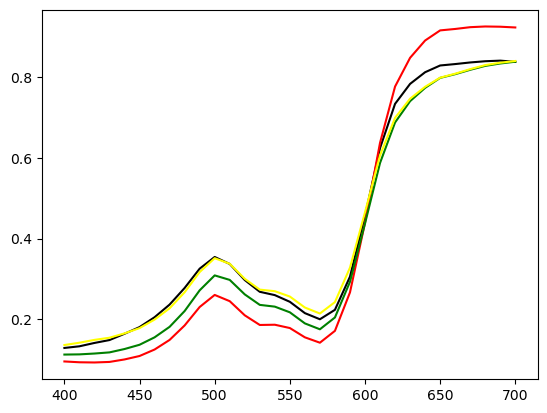

In [188]:
mets["00 20 65 100"].plot(color='black')
cijk_gamut_d65.get_spectra((0, 0.2, 0.65, 1)).plot(color='red')
cijk_gamut_d65.get_spectra((0.1, 0.1, 0.55, 0.9)).plot(color='green')
cijk_gamut_d65.get_spectra((0.1, 0.1, 0.5, 0.8)).plot(color='yellow')

In [187]:
get_adjust(cijk_gamut_d65, (0, 0.2, 0.65, 1), mets["00 20 65 100"])

[ 0.1  0.1  0.5  0.8]


(array([ 0.1 , -0.1 , -0.15, -0.2 ]), 0.008252020468717914)

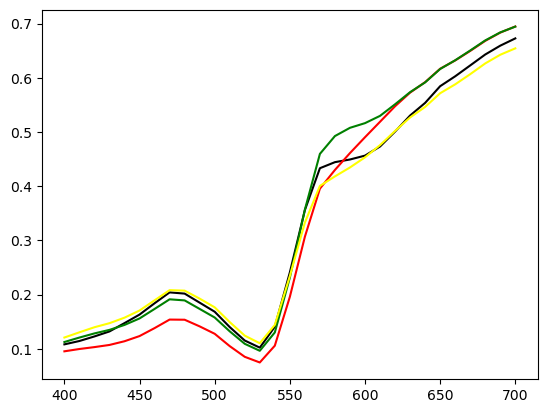

In [191]:
mets["25 100 05 60"].plot(color='black')
cijk_gamut_d65.get_spectra((0.25, 1, 0.05, 0.6)).plot(color='red')
cijk_gamut_d65.get_spectra((0.25, 0.9, 0, 0.5)).plot(color='green')
cijk_gamut_d65.get_spectra((0.3, 0.85, 0.05, 0.5)).plot(color='yellow')

In [193]:
x,y =get_adjust(cijk_gamut_d65, (0.25, 1, 0.05, 0.6), mets["25 100 05 60"])

[ 0.3   0.85  0.05  0.5 ]


In [197]:
x

array([  5.00000000e-02,  -1.50000000e-01,  -1.38777878e-17,
        -1.00000000e-01])

## Reviewing the collected data

In [217]:
data = []
for p, spectra in mets.items():
    data.append((tetrachromat_d65.observe(spectra), p))
,
data.sort(key=lambda i:i[0][3])
data

[(array([ 0.23025145,  0.30055736,  0.31884717,  0.36009098]), '25 10 65 90'),
 (array([ 0.21208861,  0.29655402,  0.34434781,  0.37151297]), '40 90 05 60'),
 (array([ 0.21866409,  0.28779808,  0.31826055,  0.37574061]), '10 10 60 90'),
 (array([ 0.20477733,  0.2789134 ,  0.32033015,  0.39533445]), '00 10 75 100'),
 (array([ 0.17688611,  0.30278625,  0.37029381,  0.40933822]), '25 100 05 60'),
 (array([ 0.23404962,  0.32505053,  0.38699038,  0.42232114]), '30 90 00 40'),
 (array([ 0.21533646,  0.3337328 ,  0.37500608,  0.44131221]), '00 20 65 100'),
 (array([ 0.22960732,  0.34697427,  0.42227817,  0.4651965 ]), '20 100 00 35')]

In [218]:
0.344 - 0.318

0.025999999999999968

ok so it looks like (10, 10, 60, 90), (40, 90, 05, 60) work -- ideally with adjustments to fix the m cone distance

my beautiful stretch goal is to make something approximating 
`(10, 10, 60, 90)` and `(25, 100, 05, 60)`
to work

### Strech goal simulcra

0.048960152636391321

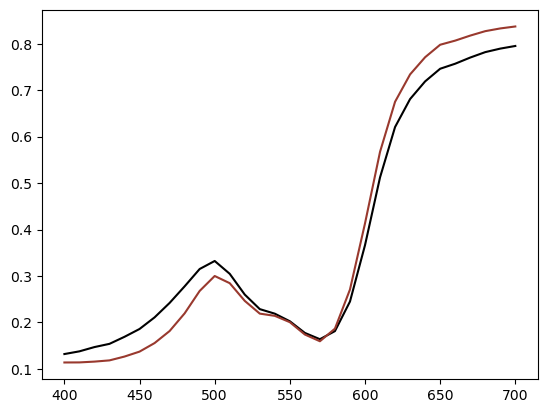

In [225]:
mets["10 10 60 90"].plot(color='black')
cijk_gamut_d65.get_spectra((0.1, 0.1, 0.6, 0.9)).plot()
compare_spectra(mets["10 10 60 90"], cijk_gamut_d65.get_spectra((0.1, 0.1, 0.6, 0.9)))

0.022760900669841076

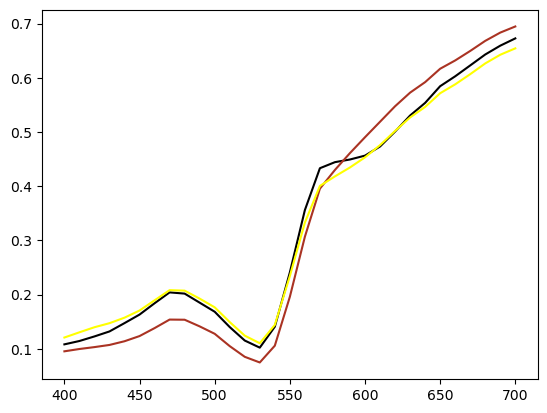

In [246]:
mets["25 100 05 60"].plot(color='black')
cijk_gamut_d65.get_spectra((0.25, 1, 0.05, 0.6)).plot()
cijk_gamut_d65.get_spectra((0.3, 0.85, 0.05, 0.5)).plot(color='yellow')
compare_spectra(mets["25 100 05 60"], cijk_gamut_d65.get_spectra((0.25, 1, 0.05, 0/6)))


In [244]:
get_adjust(cijk_gamut_d65, (0.25, 1, 0.05, 0.6), mets["25 100 05 60"])

[ 0.3   0.85  0.05  0.5 ]


(array([  5.00000000e-02,  -1.50000000e-01,  -1.38777878e-17,
         -1.00000000e-01]),
 0.0057113634105210162)

we want to lower the l value.. how do?

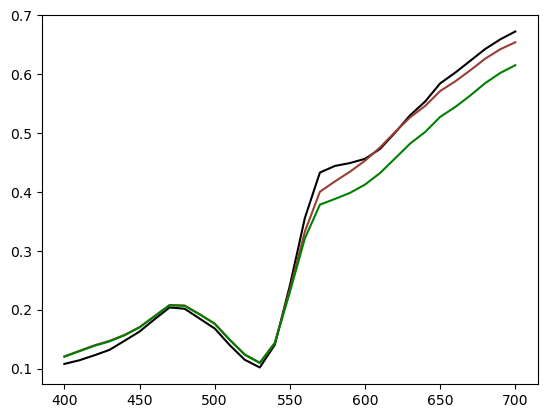

In [254]:
mets["25 100 05 60"].plot(color='black')
cijk_gamut_d65.get_spectra((0.3, 0.85, 0.05, 0.5)).plot() 
cijk_gamut_d65.get_spectra((0.35, 0.85, 0.05, 0.5)).plot(color='green') # increase c 

I've decided making the stretch goal work is a lot of wo.rk.

### Snap back to reality

ok so it looks like (10, 10, 60, 90), (40, 90, 05, 60) work -- ideally with adjustments to fix the m cone distance

0.048960152636391321

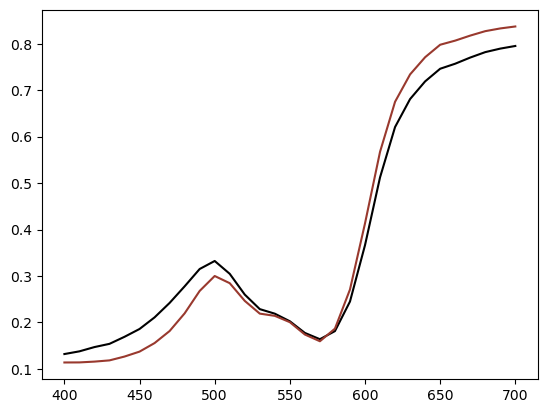

In [228]:
mets["10 10 60 90"].plot(color='black')
cijk_gamut_d65.get_spectra((0.1, 0.1, 0.6, 0.9)).plot()
compare_spectra(mets["10 10 60 90"], cijk_gamut_d65.get_spectra((0.1, 0.1, 0.6, 0.9)))

In [232]:
cijk_d65_pc, cijk_d65_perc = cijk_gamut_d65.get_point_cloud(tetrachromat_d65, stepsize=0.05)

[ 5.28436807  8.21626942  8.00093046  9.58828847]


Generating Point Cloud: 100%|█████████████| 194481/194481 [00:03<00:00, 53394.35it/s]


In [234]:
get_metamers(cijk_d65_pc, tetrachromat_d65.observe(mets["10 10 60 90"]))[:3]

[(0.033445859463438088, 72766),
 (0.027591196804335527, 72349),
 (0.026787769163629793, 72350)]

In [236]:
cijk_d65_perc[72766], cijk_d65_perc[72349], cijk_d65_perc[72350]

(array([ 0.35,  0.9 ,  0.  ,  0.05]),
 array([ 0.35,  0.85,  0.05,  0.2 ]),
 array([ 0.35,  0.85,  0.05,  0.25]))

0.035203396183081395

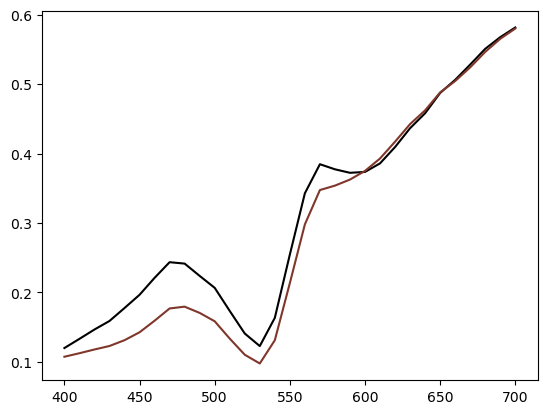

In [229]:
mets["40 90 05 60"].plot(color='black')
cijk_gamut_d65.get_spectra((0.4, 0.9, 0.05, 0.6)).plot()
compare_spectra(mets["40 90 05 60"], cijk_gamut_d65.get_spectra((0.4, 0.9, 0.05, 0.6)))

In [237]:
get_metamers(cijk_d65_pc, tetrachromat_d65.observe(mets["40 90 05 60"]))[:3]

[(0.02673593487536452, 37312),
 (0.023194122609381917, 39495),
 (0.022956068390139917, 46993)]

In [238]:
cijk_d65_perc[37312], cijk_d65_perc[39495], cijk_d65_perc[46993]

(array([ 0.2,  0. ,  0.6,  0.8]),
 array([ 0.2 ,  0.25,  0.55,  0.75]),
 array([ 0.25,  0.05,  0.55,  0.8 ]))

Lots of paths can be taken on from here.. It seems like the most reasonable is to keep `(10, 10, 60, 90)` as is and check out some metameric candidates.

In [240]:
cijk_d65_perc[72766], cijk_d65_perc[72349], cijk_d65_perc[72350]

(array([ 0.35,  0.9 ,  0.  ,  0.05]),
 array([ 0.35,  0.85,  0.05,  0.2 ]),
 array([ 0.35,  0.85,  0.05,  0.25]))

In [241]:
get_adjust(cijk_gamut_d65, (0.4, 0.9, 0.05, 0.6), mets["40 90 05 60"])

[ 0.4   0.8   0.05  0.4 ]


(array([ -5.55111512e-17,  -1.00000000e-01,  -1.38777878e-17,
         -2.00000000e-01]),
 0.002292213849735891)

so lets try printing 
1. (35, 90, 00, 05)
2. (35, 100, 00, 25)
3. (40, 90, 05, 60)
4. (40, 100, 05, 80)
5. (25, 100, 5, 60) (stretch goal)
6. (30, 100, 5, 60)


### First pass samples

In [266]:
mets3 = {}
with open(f'010924.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Mets3": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets3[name] = spectra

In [267]:
for key in mets3:
    if key in mets:
        a = mets[key]
        b = mets3[key]
        print(key, end="\t")
        print(compare_spectra(a,b))

40 90 05 60	0.00404371123043
10 10 60 90	0.0356049068871


i fukt up all the cyan values

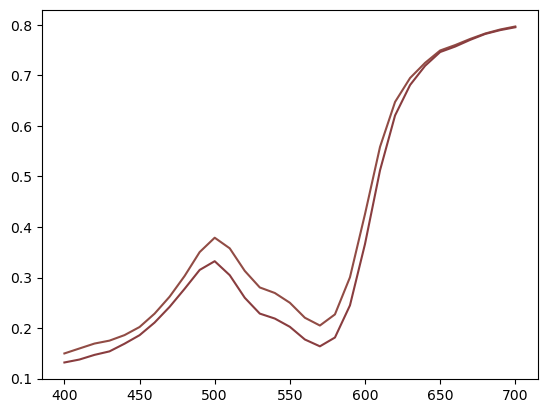

In [268]:
mets3["10 10 60 90"].plot()
mets["10 10 60 90"].plot()

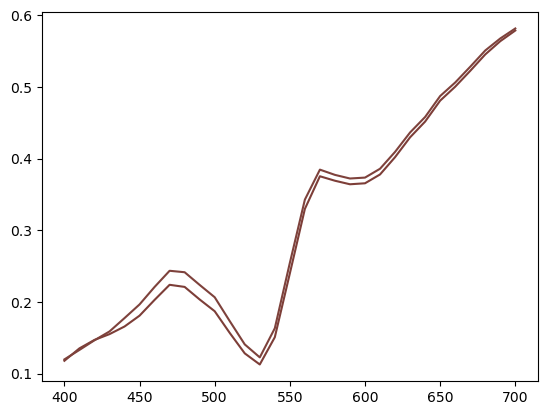

In [269]:
mets3["40 90 05 60"].plot()
mets["40 90 05 60"].plot()

In [287]:
data = []
for p, spectra in mets.items():
    data.append((tetrachromat_d65.observe(spectra), p, 0))
for p, spectra in mets3.items():
    data.append((tetrachromat_d65.observe(spectra), p, 3))

data.sort(key=lambda i:i[0][3])
[([int(10000 *a) / 100 for a in d[0]], d[1], d[2]) for d in data]

[([19.84, 28.21, 33.07, 35.84], '40 90 05 60', 3),
 ([23.02, 30.05, 31.88, 36.0], '25 10 65 90', 0),
 ([21.2, 29.65, 34.43, 37.15], '40 90 05 60', 0),
 ([21.86, 28.77, 31.82, 37.57], '10 10 60 90', 0),
 ([22.54, 29.84, 35.52, 38.64], '35 100 00 25', 3),
 ([20.47, 27.89, 32.03, 39.53], '00 10 75 100', 0),
 ([17.68, 30.27, 37.02, 40.93], '25 100 05 60', 0),
 ([23.4, 32.5, 38.69, 42.23], '30 90 00 40', 0),
 ([24.2, 34.02, 37.18, 42.78], '10 10 60 90', 3),
 ([21.53, 33.37, 37.5, 44.13], '00 20 65 100', 0),
 ([22.96, 34.69, 42.22, 46.51], '20 100 00 35', 0)]

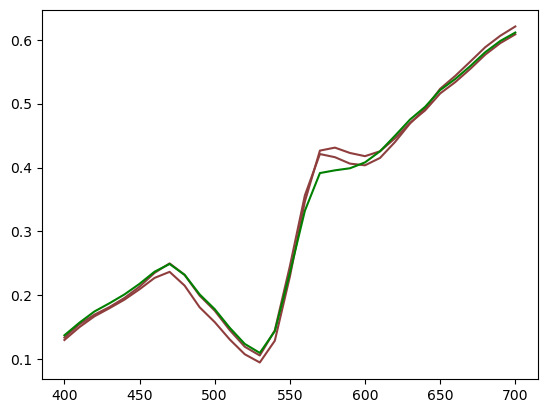

In [297]:
mets3["35 100 00 25"].plot()
cijk_gamut_d65.get_spectra((0.35, 0.9, 0, 0.05)).plot()
cijk_gamut_d65.get_spectra((0.35, 0.85, 0.05, 0.15)).plot(color='green')

In [295]:
get_adjust(cijk_gamut_d65, (0.35, 1, 0, 0.25), mets3["35 100 00 25"])

[ 0.35  0.85  0.05  0.15]


(array([ -5.55111512e-17,  -1.50000000e-01,   5.00000000e-02,
         -1.00000000e-01]),
 0.0028139780030847265)

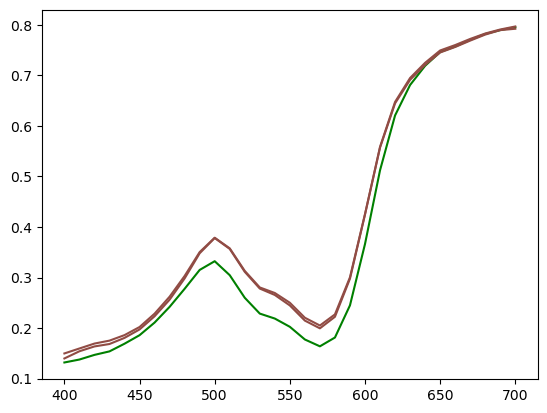

In [289]:
mets["10 10 60 90"].plot(color='green')
mets2["10 10 60 90"].plot()
mets3["10 10 60 90"].plot()

In [291]:
print(tetrachromat_d65.observe(mets["10 10 60 90"]))
print(tetrachromat_d65.observe(mets2["10 10 60 90"]))
print(tetrachromat_d65.observe(mets3["10 10 60 90"]))

[ 0.21866409  0.28779808  0.31826055  0.37574061]
[ 0.23627433  0.3361545   0.36755918  0.42364919]
[ 0.24207132  0.34027956  0.37188284  0.42784319]


## consistency interlude

In [310]:
m10_10_60_90 = {}
with open(f'010924.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "10 10 60 90": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        m10_10_60_90[i] = spectra

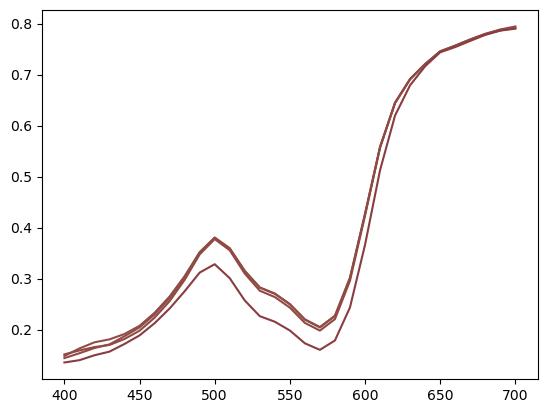

In [313]:
for s in m10_10_60_90.values():
    s.plot()

In [304]:
m35_100_00_25 = {}
with open(f'010924.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "35 100 00 25": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        m35_100_00_25[i] = spectra

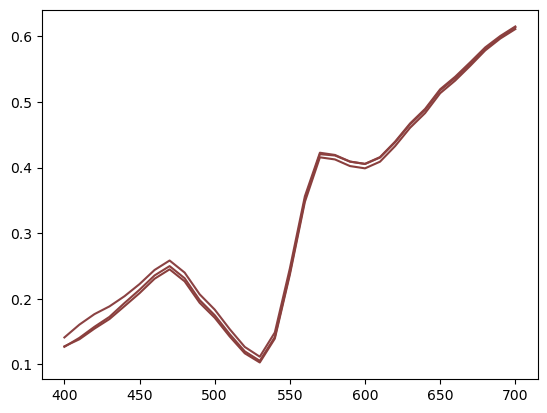

In [314]:
for s in m35_100_00_25.values():
    s.plot()

In [306]:
m40_90_05_60 = {}
with open(f'010924.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "40 90 05 60": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        m40_90_05_60[i] = spectra

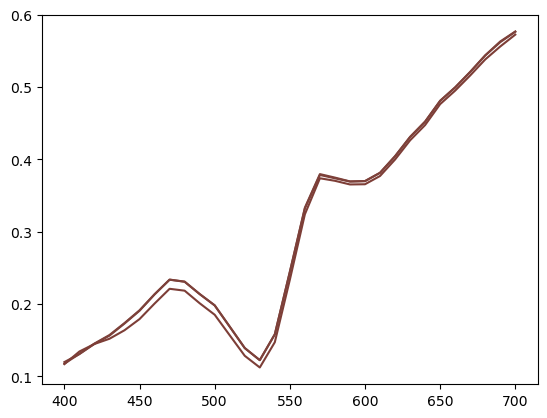

In [315]:
for s in m40_90_05_60.values():
    s.plot()